In [13]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.image import imread
from sklearn.decomposition import PCA

matrix = np.array([[-1, 0, 0], [1, 4, 4], [-1, -2, -2]])


def compress_image(image, components):
    pca = PCA(n_components=components)
    image_compressed = pca.fit_transform(image)
    new_image = pca.inverse_transform(image_compressed)
    plt.imshow(new_image, cmap="gray")
    plt.show()


def eigen(matrix):
    (eigenvalues, eigenvectors) = np.linalg.eig(matrix)
    for index in range(len(eigenvectors)):
        matrix_dot = np.dot(matrix, eigenvectors[:, index])
        eigen_dot = np.dot(eigenvalues[index], eigenvectors[:, index])
        if not np.allclose(matrix_dot, eigen_dot):
            print("Error")
            return
    return eigenvalues, eigenvectors


def get_sorted_eigenvalues(matrix):
    mean = np.mean(matrix)
    std = np.std(matrix)
    std_matrix = (matrix - mean) / std
    cov_matrix = np.cov(std_matrix)
    eigenvalues, _ = eigen(cov_matrix)
    index = np.argsort(eigenvalues)[::-1]
    return eigenvalues[index]


def encrypt_message(message, key_matrix):
    message_vector = np.array([ord(char) for char in message])
    eigenvalues, eigenvectors = np.linalg.eig(key_matrix)
    diagonalized_key_matrix = np.dot(
        np.dot(eigenvectors, np.diag(eigenvalues)), np.linalg.inv(eigenvectors)
    )
    encrypted_vector = np.dot(diagonalized_key_matrix, message_vector)
    return encrypted_vector


def decrypt_message(encrypted_vector, key_matrix):
    eigenvalues, eigenvectors = np.linalg.eig(key_matrix)
    diagonalized_key_matrix = np.dot(
        np.dot(eigenvectors, np.diag(eigenvalues)), np.linalg.inv(eigenvectors)
    )
    decrypted_vector = np.dot(np.linalg.inv(diagonalized_key_matrix), encrypted_vector)
    decrypted_message = "".join([chr(int(np.round(char))) for char in decrypted_vector])
    return decrypted_message

In [14]:
eigenvalues, eigenvectors = eigen(matrix)
print("Eigenvalues:", eigenvalues)
print("Eigenvectors:", eigenvectors)

Eigenvalues: [ 0.  2. -1.]
Eigenvectors: [[ 0.          0.          0.57735027]
 [ 0.70710678 -0.89442719 -0.57735027]
 [-0.70710678  0.4472136   0.57735027]]


(720, 1080, 3)


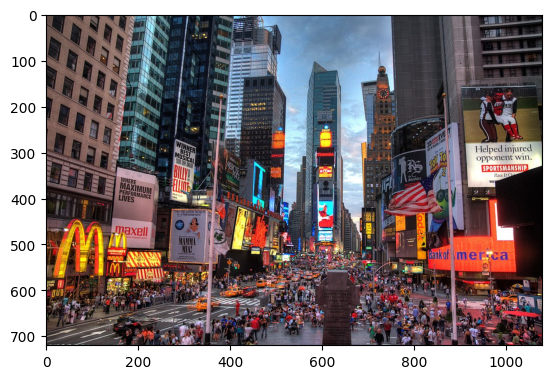

In [15]:
image_raw = imread("image.jpg")
print(image_raw.shape)
plt.imshow(image_raw)
plt.show()

(720, 1080)
1.0


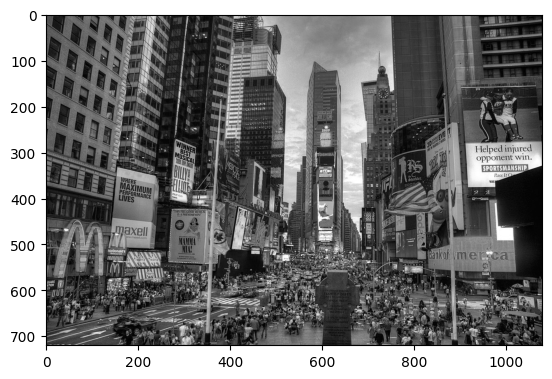

In [16]:
image_sum = image_raw.sum(axis=2)
print(image_sum.shape)
image_bw = image_sum / image_sum.max()
print(image_bw.max())
plt.imshow(image_bw, cmap="gray")
plt.show()

In [25]:
eigenvalues = get_sorted_eigenvalues(image_bw)
cumulative = np.cumsum(eigenvalues) / np.sum(eigenvalues)
print("Cumulative variance: ", cumulative)
cumulative = cumulative * 100

Cumulative variance:  [0.2524662  0.36982582 0.45567346 0.50784984 0.55080914 0.57769654
 0.60130204 0.62183176 0.63929581 0.65568805 0.66915763 0.68132862
 0.69266687 0.70357638 0.71286185 0.72176941 0.72995107 0.7371491
 0.74388357 0.75053092 0.75675216 0.76274795 0.76852999 0.77357211
 0.77858044 0.78342796 0.78787585 0.7922985  0.79655243 0.80065673
 0.80469562 0.80852027 0.81219899 0.8158342  0.81934809 0.82260424
 0.82580403 0.82887541 0.83186611 0.83477476 0.83759207 0.84028416
 0.84290477 0.8454946  0.8479797  0.85036628 0.85270131 0.85500466
 0.85724409 0.85945338 0.86157606 0.86368104 0.86571928 0.8676875
 0.86960987 0.87149394 0.87334467 0.87512457 0.87683162 0.87853484
 0.88017427 0.88179004 0.88335892 0.88490999 0.88641671 0.88790335
 0.8893694  0.89078707 0.89217696 0.89355207 0.894901   0.89623484
 0.89752227 0.89879194 0.90004908 0.90130167 0.90251764 0.90369339
 0.90485196 0.90599197 0.90712156 0.90821321 0.90928582 0.91033983
 0.91136868 0.91238789 0.91340135 0.914405

AttributeError: module 'matplotlib.pyplot' has no attribute 'label'

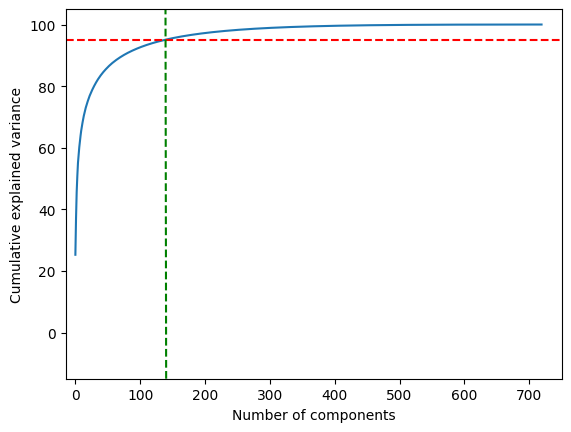

In [41]:
plt.plot(cumulative)
plt.plot([-15, 750], [95, 95], "r--")
plt.plot([140, 139], [-15, 105], "g--")
plt.xlim(-15, 750)
plt.ylim(-15, 105)
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.label("Cumulative explained variance by components")

In [19]:
components = np.argmax(cumulative > 95) + 1
print("Components(95%): ", components)

Components(95%):  139


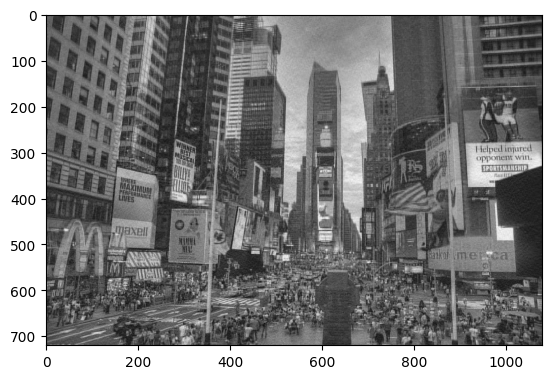

In [20]:
compress_image(image_bw, components)

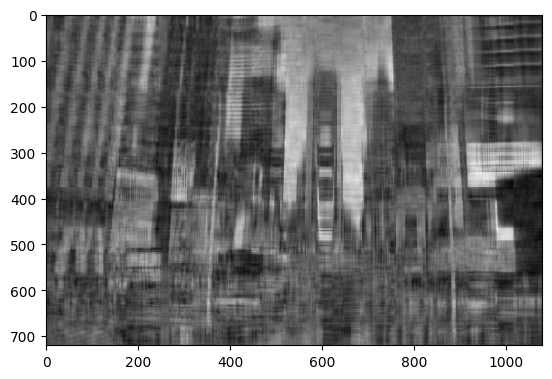

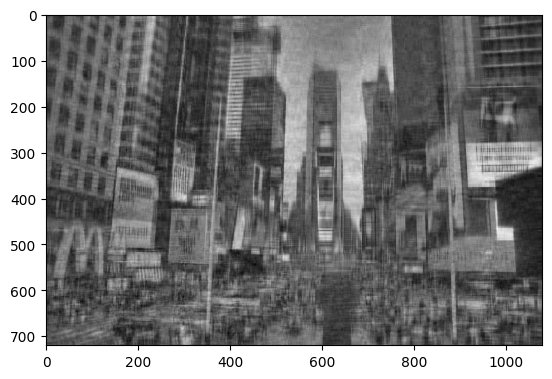

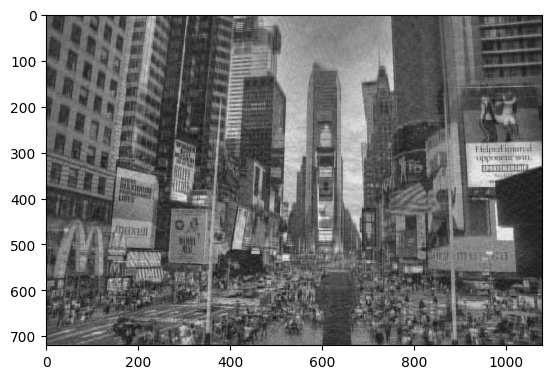

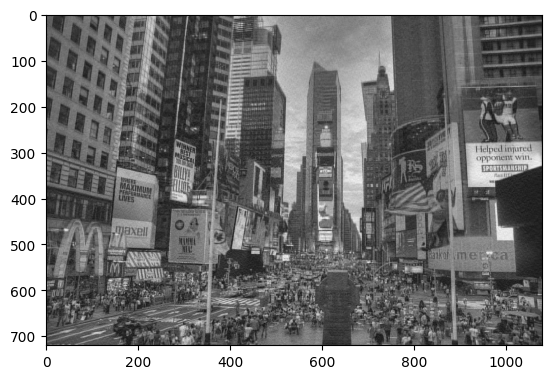

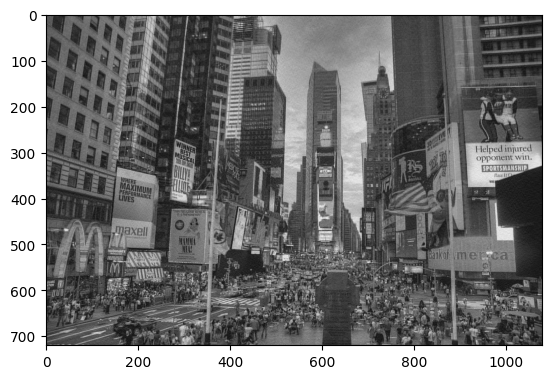

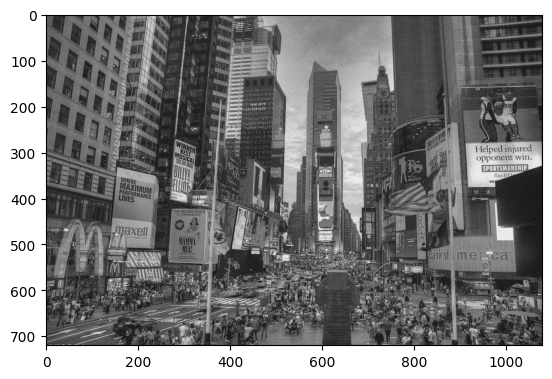

In [10]:
compress_image(image_bw, 15)
compress_image(image_bw, 35)
compress_image(image_bw, 75)
compress_image(image_bw, 150)
compress_image(image_bw, 200)
compress_image(image_bw, 250)

In [11]:
message = "Hello, World!"
key_matrix = np.random.randint(0, 256, (len(message), len(message)))
encrypted_message = encrypt_message(message, key_matrix)
print("Encrypted message:", encrypted_message)

Encrypted message: [142055.-6.51629203e-13j 119892.-9.09526394e-12j 127220.-2.76091478e-12j
 151756.-6.17745188e-13j 105340.-5.37115491e-12j 161483.+2.26650775e-13j
 149162.-3.33836750e-12j 138326.-4.30604276e-12j 126250.-4.07695629e-12j
 118072.-3.57946073e-12j 133701.-7.79645956e-13j 104482.-8.32184618e-12j
 147579.-7.12013098e-12j]


In [12]:
decrypted_message = decrypt_message(encrypted_message, key_matrix)
print("Decrypted message:", decrypted_message)

NameError: name 'штеnp' is not defined